In [2]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("kccdatasets.csv",encoding='latin-1')
df

,Source.Name,StateName,DistrictName,BlockName,Sector,Category,Crop,QueryType,QueryText,KccAns,CreatedOn,year,month
0,apr.csv,UTTAR PRADESH,JYOTIBA PHULE NAGAR,JOYA,AGRICULTURE,Sugar and Starch Crops,Sugarcane (Noble Cane),\tWater Management\t,Provide information for irrigation in sugarcan...,à¤¶à¥à¤°à¥à¤®à¤¾à¤¨ à¤à¥ à¤à¤¨à¥à¤¨à¥ à...,04-02-2024 09:14,2024,4
1,apr.csv,UTTAR PRADESH,JYOTIBA PHULE NAGAR,DHANAURA,HORTICULTURE,Fruits,Papaya,Fertilizer Use and Availability,Information about fertilizer management in pap...,"à¤¶à¥à¤°à¥à¤®à¤¾à¤¨ à¤à¥,à¤¸à¥à¤à¥à¤·à¥...",04-02-2024 11:59,2024,4
2,apr.csv,UTTAR PRADESH,JYOTIBA PHULE NAGAR,AMROHA,HORTICULTURE,Fruits,Mango,\tPlant Protection\t,Information about Powdery mildew disease in ma...,à¤¶à¥à¤°à¥à¤®à¤¾à¤¨ à¤à¥ à¤à¤® à¤à¥ à¤ª...,04-02-2024 19:25,2024,4
3,apr.csv,UTTAR PRADESH,JYOTIBA PHULE NAGAR,JOYA,HORTICULTURE,Fruits,Mango,\tPlant Protection\t,Information about fruit setting in mango trees...,à¤¸à¤° à¤à¤ª Naphthalene Acetic Acid 4.5%SL -...,04-03-2024 15:20,2024,4
4,apr.csv,UTTAR PRADESH,JYOTIBA PHULE NAGAR,AMROHA,AGRICULTURE,Cereals,Wheat,Weather,Farmer asked query on Weather,à¤®à¤¹à¥à¤¦à¤¯ à¤à¥ à¤à¤ª à¤à¥ à¤à¥à¤·...,04-04-2024 19:08,2024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45622,sep.csv,UTTAR PRADESH,AMROHA,0,AGRICULTURE,Others,Others,Government Schemes,Information related to loan on Kisan Credit Card?,à¤®à¤¹à¥à¤¦à¤¯ à¤¯à¤¦à¤¿ à¤²à¤¾à¤­à¤¾à¤°à¥à¤...,09-11-2024 12:23,2024,9
45623,sep.csv,UTTAR PRADESH,AMROHA,0,HORTICULTURE,Fruits,Mango,Vegetative Propagation and Tissue Culture,TELL ME CONTACT NUMBER OF IARI PUSA DELHI ?,à¤ªà¥à¤¸à¤¾ à¤¦à¤¿à¤²à¥à¤²à¥ à¤à¥ à¤¸à¤à...,09-11-2024 16:32,2024,9
45624,sep.csv,UTTAR PRADESH,AMROHA,0,HORTICULTURE,Fruits,Mango,Vegetative Propagation and Tissue Culture,Farmer asked about Saharanpur Nursery Contact ...,Saharanpur Nursery of Uttar Pradesh Contact U...,09-11-2024 16:34,2024,9
45625,sep.csv,UTTAR PRADESH,AMROHA,0,AGRICULTURE,Cereals,Paddy (Dhan),Cultural Practices,Farmer asked query on Weather,à¤¶à¥à¤°à¥à¤®à¤¾à¤¨ à¤à¥ à¤®à¥à¤¸à¤® à¤à...,9/15/2024 7:00,2024,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45627 entries, 0 to 45626
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source.Name   45627 non-null  object
 1   StateName     45627 non-null  object
 2   DistrictName  45627 non-null  object
 3   BlockName     45627 non-null  object
 4   Sector        45627 non-null  object
 5   Category      45627 non-null  object
 6   Crop          45627 non-null  object
 7   QueryType     45627 non-null  object
 8   QueryText     45627 non-null  object
 9   KccAns        45625 non-null  object
 10  CreatedOn     45627 non-null  object
 11  year          45627 non-null  int64 
 12  month         45627 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

Source.Name     0
StateName       0
DistrictName    0
BlockName       0
Sector          0
Category        0
Crop            0
QueryType       0
QueryText       0
KccAns          2
CreatedOn       0
year            0
month           0
dtype: int64

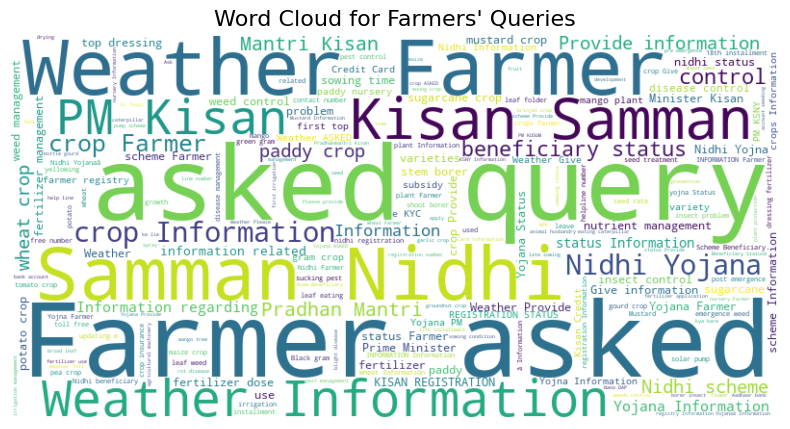

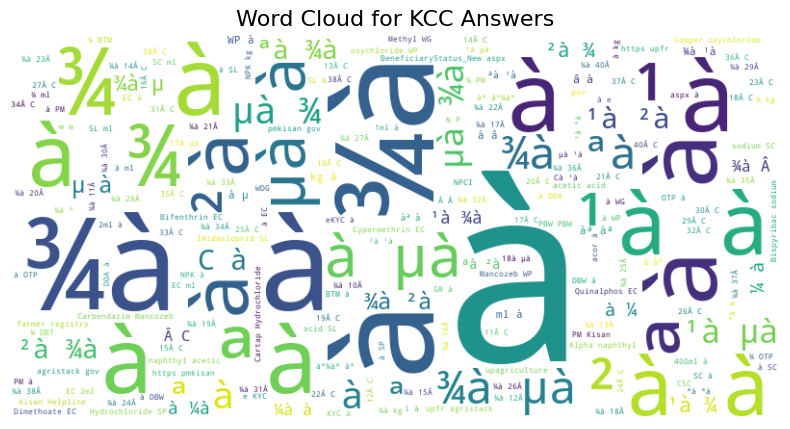

In [6]:
# 1. Word Cloud for Queries (QueryText)
text_queries = ' '.join(df['QueryText'].dropna())

# Create Word Cloud
wordcloud_queries = WordCloud(width=800, height=400, background_color='white').generate(text_queries)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_queries, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Farmers' Queries", fontsize=16)
plt.show()

# 2. Word Cloud for Responses (KccAns)
text_answers = ' '.join(df['KccAns'].dropna())

# Create Word Cloud for responses
wordcloud_answers = WordCloud(width=800, height=400, background_color='white').generate(text_answers)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_answers, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for KCC Answers", fontsize=16)
plt.show()


In [7]:
from textblob import TextBlob
import plotly.express as px

# Sentiment analysis of KccAns
df['Sentiment'] = df['KccAns'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment into categories
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot Sentiment Distribution using Plotly
sentiment_counts = df['Sentiment Category'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title="Sentiment Distribution of Responses")
fig.show()